In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import scipy.stats as stats

from sklearn import datasets

In [18]:
iris = pd.read_csv("/home/samy/csv_pickle_parquet/iris.csv")


<Axes: >

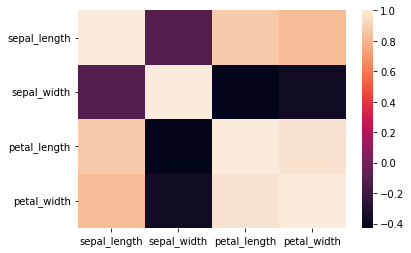

In [21]:
iris_quant = iris[["sepal_length","sepal_width","petal_length","petal_width"]]
sns.heatmap(iris_quant.corr())

<Axes: xlabel='petal_length', ylabel='petal_width'>

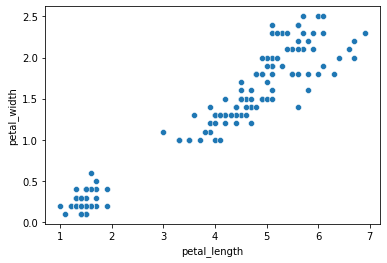

In [22]:
sns.scatterplot(x="petal_length",y="petal_width",data=iris)

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

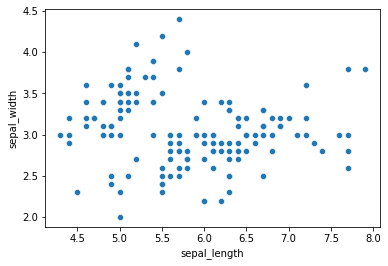

In [23]:
sns.scatterplot(x="sepal_length",y="sepal_width",data=iris)

In [24]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='species', ylabel='value'>

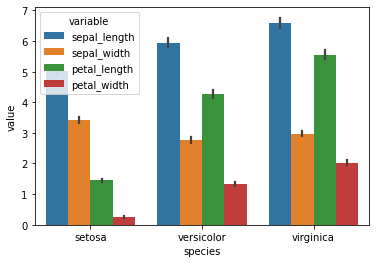

In [41]:
iris_melt = iris.melt(id_vars="species",value_vars = ["sepal_length","sepal_width","petal_length","petal_width"])
iris_melt

sns.barplot(x="species",y="value",hue="variable",data=iris_melt)

<Axes: >

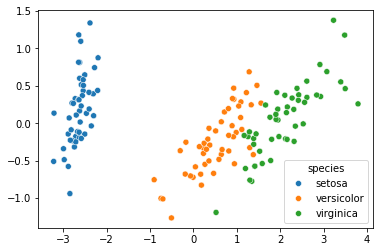

In [42]:
# ACP en utilisant sci-kit learn

acp = PCA(n_components=2)
pcs = acp.fit_transform(iris_quant)
sns.scatterplot(x=pcs[:,0],y=pcs[:,1],hue=iris["species"])

<Axes: xlabel='0', ylabel='1'>

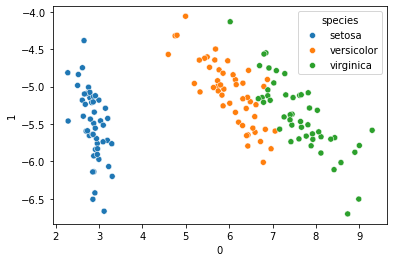

In [95]:
#ACP sans les mains youhouuuu

matrice_cov = (iris_quant - iris_quant.mean()).T @ (iris_quant - iris_quant.mean())

from sklearn.preprocessing import StandardScaler

eigenvalues,eigenvectors = np.linalg.eig(matrice_cov)

components_transformer = eigenvectors[:,:2]

new_components = iris_quant @ components_transformer


sns.scatterplot(x=0,y=1,data=new_components,hue=iris["species"])

